In [5]:
import numpy             as np
import matplotlib.pyplot as plt
import scipy.sparse      as sparse
import scipy.special     as sp
import hylife.utilitis_FEEC.bsplines             as bsp
import hylife.utilitis_FEEC.evaluation           as eva
import hylife.geometry.mappings_analytical       as mapping
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import time
%load_ext jupyternotify

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [6]:
import numpy             as np
import matplotlib.pyplot as plt

import hylife.utilitis_FEEC.projectors_global as proj_glob
import hylife.utilitis_FEEC.evaluation as eva

import hylife.utilitis_FEEC.bsplines as bsp
import hylife.utilitis_FEEC.derivatives          as derivatives


In [7]:
alpha_it=np.linspace(0.01,1,50)

matrix([[0.125, 0.75 , 0.125, ..., 0.   , 0.   , 0.   ],
        [0.   , 0.125, 0.75 , ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.125, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.125, 0.75 , 0.125],
        [0.125, 0.   , 0.   , ..., 0.   , 0.125, 0.75 ],
        [0.75 , 0.125, 0.   , ..., 0.   , 0.   , 0.125]])

In [221]:
fun = lambda xi1 : np.sin( np.pi*( np.sin(2.*np.pi*xi1) ) )
L = 2.
deg=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
bc = True
Nel = 16
Nq = 6
el_b = np.linspace(0., L, Nel + 1)
dx=df_inv
v=1
dt=np.linspace(0.0001,0.1,5)
alpha_it=v*dt/dx
lamb=np.zeros((len(alpha_it),len(deg)))
kk=1
unst=np.zeros((len(In),len(deg),len(alpha_it)))
for m in range(len(alpha_it)):
    for l in range(len(deg)) :
        alpha=alpha_it[m]
        p=deg[l]
        T = bsp.make_knots(el_b, p, bc)
        obj = proj_glob.projectors_1d(T, p, bc, Nq)
        coeffs = obj.PI_1(fun)
        In=np.linalg.inv(obj.D.todense())
        der = derivatives.GRAD_1d(T, p, bc)
        for i in range(0,len(In)):
            #print(np.sum([der.dot(In)[i,j+1] for j in range(len(In)-1)]))
            lm=((1-alpha*der.dot(In)[i,i]-alpha*
            np.sum([der.dot(In)[i,j+1]*np.cos(2*np.pi/Nel*(j+1)*kk) for j in range(len(In)-1)]))**2+(alpha*np.sum([der.dot(In)[i,j+1]
            *np.sin(2*np.pi/Nel*(j+1)*kk) for j in range(len(In)-1)])))**2
            if lm>1:
                #print(str(i)+'-th lambda unstable for param'+str(l)+str(m))
                unst[i,l,m]=0
            else:
                unst[i,l,m] =1
        if 0 in unst[l][m].flatten():
            print('Unstable Scheme for config: '+str(l)+str(m))
        else: 
            print('stable for config:'+str(l)+str(m))
        lamb[m][l]=lm

Unstable Scheme for config: 00
Unstable Scheme for config: 10
Unstable Scheme for config: 20
Unstable Scheme for config: 30
Unstable Scheme for config: 40
Unstable Scheme for config: 50
Unstable Scheme for config: 60
Unstable Scheme for config: 70
Unstable Scheme for config: 80
Unstable Scheme for config: 90
Unstable Scheme for config: 100
Unstable Scheme for config: 110
Unstable Scheme for config: 120
Unstable Scheme for config: 130
Unstable Scheme for config: 01
Unstable Scheme for config: 11
Unstable Scheme for config: 21
Unstable Scheme for config: 31
Unstable Scheme for config: 41
Unstable Scheme for config: 51
Unstable Scheme for config: 61
Unstable Scheme for config: 71
Unstable Scheme for config: 81
Unstable Scheme for config: 91
Unstable Scheme for config: 101
Unstable Scheme for config: 111
Unstable Scheme for config: 121
Unstable Scheme for config: 131
Unstable Scheme for config: 02
Unstable Scheme for config: 12
Unstable Scheme for config: 22
Unstable Scheme for config: 32


In [219]:
for m in range(len(alpha_it)):
for l in range(len(deg)) :
    if 1 in unst[0][0].flatten():
        print('Unstable Scheme')

IndentationError: expected an indented block (<ipython-input-219-275e6d589227>, line 2)

In [20]:
rho_ini_phys = lambda x : (np.sin(2*np.pi*x/L))
vx = 1.

In [22]:
xi2=[0]
xi3=[0]
def func(xi1):
    x = mapping.f(xi1,xi2,xi3, *args_map, 1)
    df_inv=mapping.df_inv(xi1, xi2, xi3, *args_map, 1*10+1)
    return rho_ini_phys(x)*df

In [23]:
def density_analytical(dt,ntsteps):
    global x_m
    rho_ex_1=np.empty(len(xi1))
    for i1 in range(len(xi1)):
        idx=i1
        xt = x_m[idx] -ntsteps*dt*1
        rho_ex_1[idx] = rho_ini_phys(xt)
    return rho_ex_1

In [199]:
L=2
args_map=[1, [L,L,L]]
rho_ini_phys = lambda x: (np.sin(2*np.pi*x/L))
p=5
bc = True
Nel = 16
Nq = 6
el_b = np.linspace(0., 1., Nel + 1)
xi1=np.array(el_b)
xi2=np.array([0])
xi3=np.array([0])
x = mapping.f(xi1,xi2,xi3, *args_map, 1)
detdf=mapping.det_df(xi1,xi2,xi3, *args_map)
df_inv=mapping.df_inv(xi1, xi2, xi3, *args_map, 1*10+1)
df=mapping.df(xi1, xi2, xi3, *args_map, 1*10+1)
obj = proj_glob.projectors_1d(T, p, bc, Nq)
der = derivatives.GRAD_1d(T, p, bc)

In [200]:
coeffs = obj.PI_1(func)
v=vx*df_inv

0.0001738420853220346

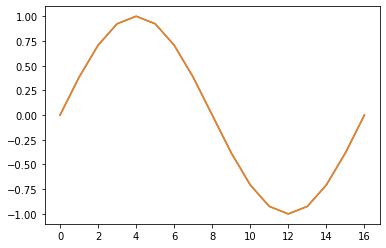

In [201]:
x_m=np.empty(len(xi1))
det=np.empty(len(xi1))
for idx in range(len(xi1)):
    i1=idx
    x_m[idx]= mapping.f(xi1[i1],xi2,xi3, *args_map, 1)
    det[idx] = mapping.df_inv(xi1, xi2, xi3, *args_map, 1*10+1)
fig = plt.figure()
rho_0_plot=eva.FEM_field_1d(coeffs, 1, xi1, T, p, bc)*0.5
plt.plot(rho_0_plot)
plt.plot(rho_ini_phys(x_m))
np.amax(np.abs(rho_ini_phys(x_m)-rho_0_plot))

In [202]:
def func(xi1):
    x = mapping.f(xi1,xi2,xi3, *args_map, 1)
    df_inv=mapping.df_inv(xi1, xi2, xi3, *args_map, 1*10+1)
    return rho_ini_phys(x)*df
def rhov(xi1):
    global coeffs
    global v
    rx=eva.FEM_field_1d(coeffs, 1, np.array([xi1]), T, p, bc)
    return v*rx
v=vx*df_inv

In [203]:
rhv=obj.PI_0(rhov)

In [215]:
coeffs = obj.PI_1(func)
dt=0.1
L1_ERROR=[]
for it in range(100):
    rhv=obj.PI_0(rhov)
    rho_t=-der.dot(rhv)
    coeffs=np.copy(coeffs+dt*rho_t)
    rho_0_plot=eva.FEM_field_1d(coeffs, 1, xi1, T, p, bc)*df_inv
    rho_ex_1=density_analytical(dt,it+1)
    l1_error=np.sum(np.abs(rho_ex_1-rho_0_plot))
    L1_ERROR.append(l1_error)

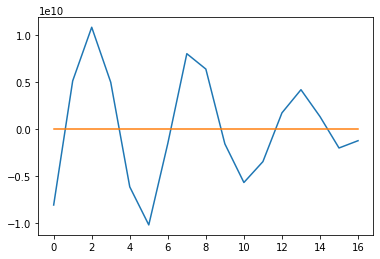

In [216]:
fig = plt.figure()
rho_0_plot=eva.FEM_field_1d(coeffs, 1, xi1, T, p, bc)*0.5
plt.plot(rho_0_plot)
plt.plot(rho_ex_1)
#plt.plot(density_analytical(dt,1))

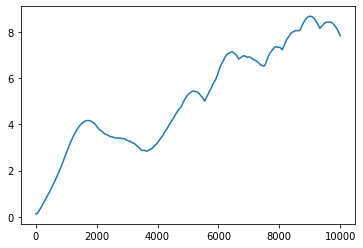

In [111]:
fig = plt.figure()
plt.plot(L1_ERROR)

In [70]:
0.01/0.0625

0.16

(0, 1000)

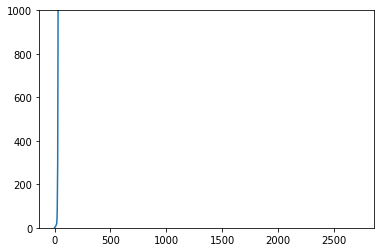

In [211]:
fig = plt.figure()
plt.plot(L1_ERROR)
plt.ylim(0,1000)